# > TELECOM CUSTOMER CHURN PREDICTION 📈

## 1. Introduction

#### What is Customer Churn?
Customer churn happens when customers or subscribers stop doing business with a company or service.

In the telecom industry, customers have many service providers to choose from and often switch between them. This competitive market sees an annual churn rate of 15-25 percent.

Retaining each customer individually is challenging because companies have many customers and can't spend too much time on each one without incurring high costs. However, if a company can predict which customers are likely to leave, it can focus its retention efforts on these "high-risk" clients. The main goal is to expand its customer base and increase customer loyalty. Success in this market depends heavily on the customers.

Customer churn is crucial because it's cheaper to keep existing customers than to attract new ones.

To reduce churn, telecom companies need to predict which customers are at high risk of leaving.

To spot early signs of potential churn, companies need a comprehensive view of customer interactions across various channels, like store visits, purchase histories, customer service calls, online transactions, and social media.

By addressing churn, businesses can not only maintain their market position but also grow and succeed. More customers in their network mean lower initiation costs and higher profits. Therefore, reducing churn and implementing effective retention strategies is key to a company's success.

#### Indian Scenario
In India, the telecom market is highly competitive, with major players like Airtel, Reliance Jio, and Vodafone-Idea vying for market share. The Indian telecom industry faces a significant churn rate as customers frequently switch between providers for better data plans, network quality, and customer service. For instance, a customer might switch from Vodafone-Idea to Reliance Jio for more affordable data plans and better network coverage.

Telecom companies in India must predict and address customer churn to retain their user base. By analyzing customer behavior and interactions, such as recharge patterns, data usage, customer service interactions, and social media feedback, companies can identify customers at risk of churning. Implementing targeted retention strategies, such as personalized offers and improved customer support, can help reduce churn and increase customer loyalty.

#### Objectives
I will explore the data to answer questions such as:

- What percentage of customers churn, and how many remain active?
- Are there patterns in churn based on gender?
- Are there patterns or preferences in churn based on the type of service provided?
- What are the most profitable service types?
- Which features and services generate the most profit?
- And many more questions that may arise during the analysis.

By analyzing these questions, we aim to understand customer churn better and develop strategies to reduce it, especially in competitive markets like India.m

## 2. Loading libraries and data

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [3]:
#loading data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## 3.  Undertanding the data



Each row represents an individual customer, and each column contains specific attributes about that customer as detailed in the column metadata.

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**` The data set contains the following information: `**

- Customers who left within the last month , indicated in the column labeled Churn. 
- Services each customer has signed up for, such as phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
- Customer account details, including how long they’ve been a customer, contract type, payment method, paperless billing status, monthly charges, and total charges.
- Demographic information about customers, including gender, age range, and whether they have partners and dependents.

In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
# Display summary statistics of the dataframe
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


## 4. Visualize missing values

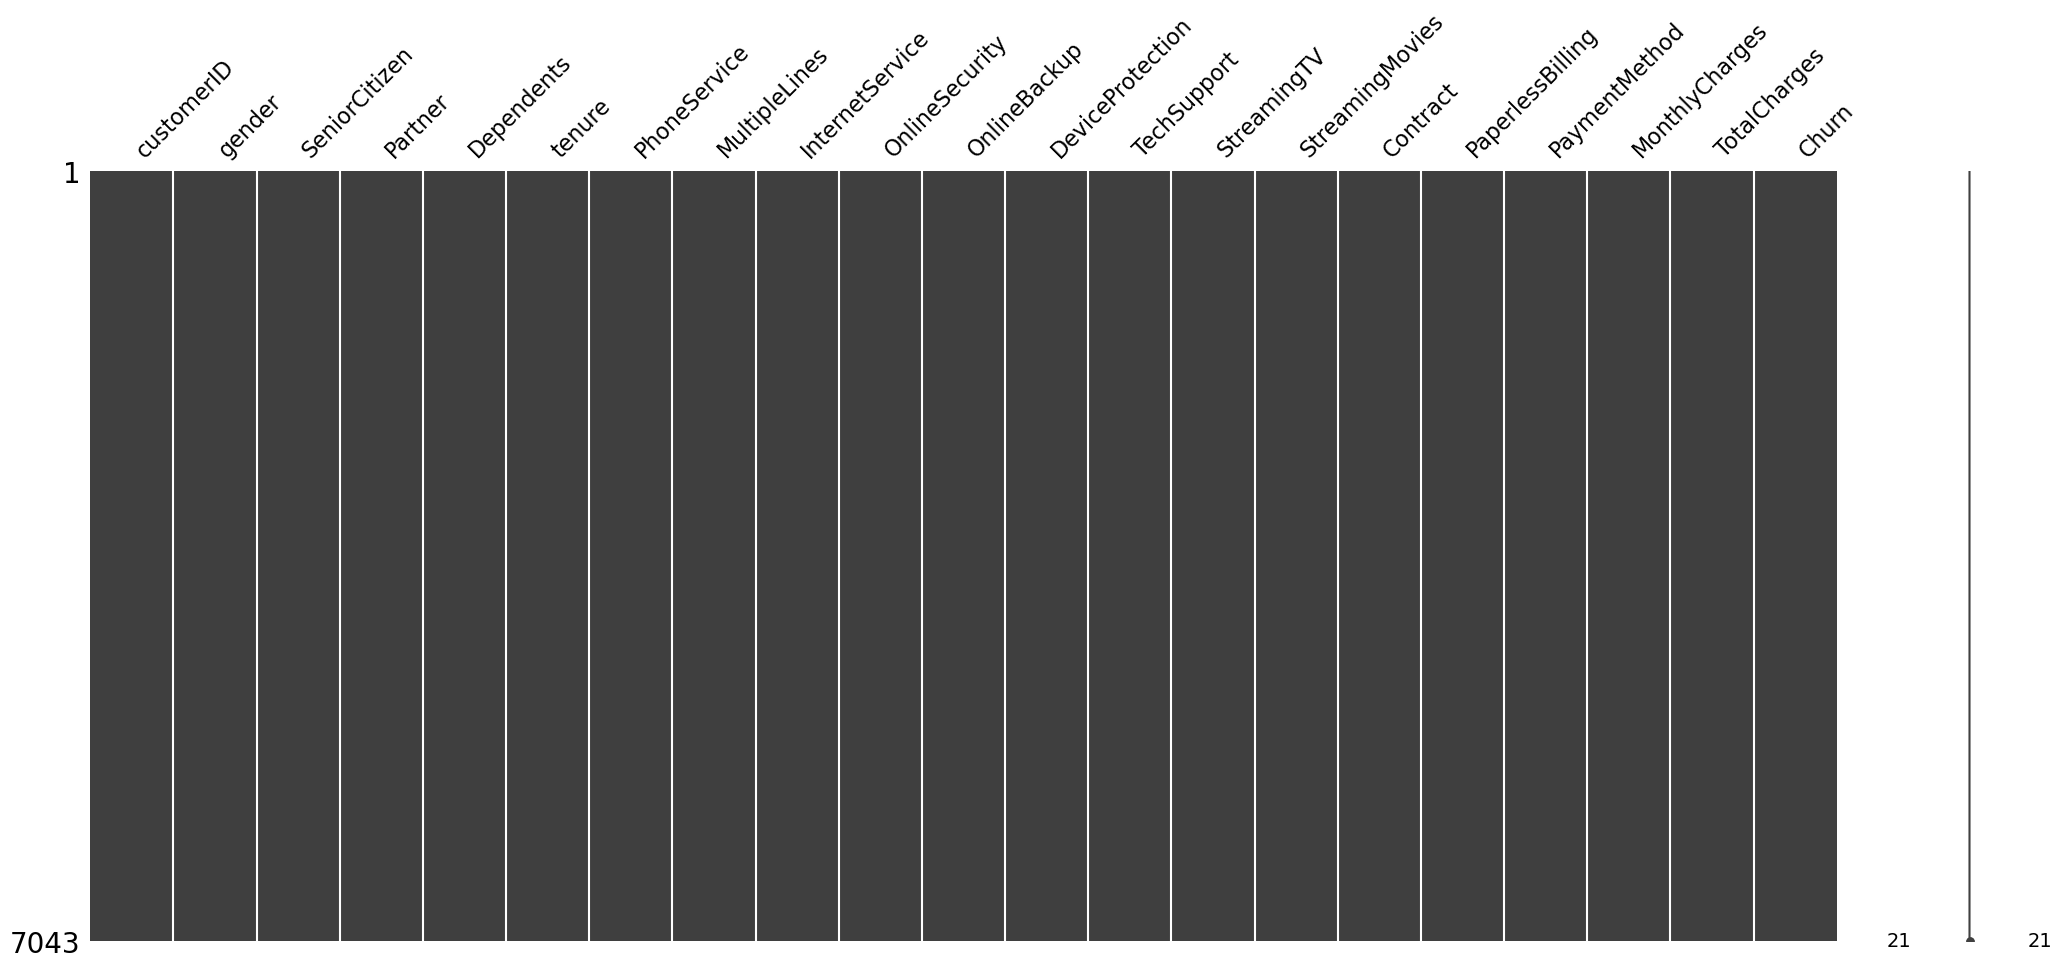

In [10]:
# Visualize missing values as a matrix
msno.matrix(df);

### Using this matrix, we can quickly identify any patterns of missing data in the dataset.

- #### From the visualization above, we can see that there is no distinct pattern of missingness. In fact, there is no missing data at all.

## 5. Data Manipulation

In [11]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- **Removing the CustomerID column as it is irrelevant in Predicting.**

In [12]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- **Upon closer examination, we can identify some indirect missing data, which may appear as blank spaces.**

### Displaying all the rows of TotalCharges with NaN values.

In [13]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- **It is also notable that the Tenure column has entries with a value of 0, even though the MonthlyCharges column is not empty. Let's check if there** **are any other 0 values in the Tenure column.** 

In [14]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

- There are no additional missing values in the Tenure column.
- Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.
- And since there the rows with missing values of totalcharges and 0 tenure are common the missing rows of that will be removed too

In [15]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [16]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 6. Data Imputation

In [17]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 7. Data Visualization

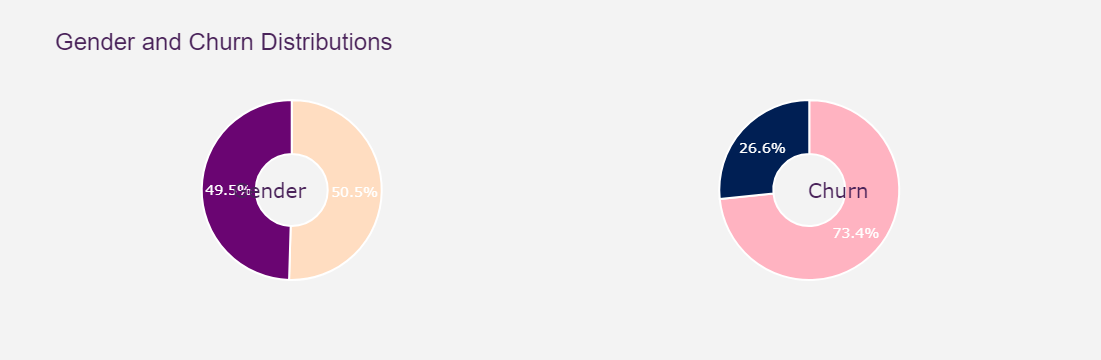

In [56]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender",
                     marker=dict(colors=['#FFDDC1', '#6A0572'], line=dict(color='#FFFFFF', width=2))),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn",
                     marker=dict(colors=['#FFB3C1', '#001F54'], line=dict(color='#FFFFFF', width=2))),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont=dict(size=14, color='white'), textposition='inside')

fig.update_layout(
    title_text="Gender and Churn Distributions",
    title_font=dict(size=24, family='Arial', color='#4A235A'),
    showlegend=False,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font=dict(size=20, color='#4A235A'), showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font=dict(size=20, color='#4A235A'), showarrow=False)],
    paper_bgcolor='#F3F3F3',
    plot_bgcolor='#F3F3F3'
)

fig.show()


- 26.6 % of customers switched to another firm.- 
Customers are 49.5 % female and 50.5 % male.

In [19]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [20]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

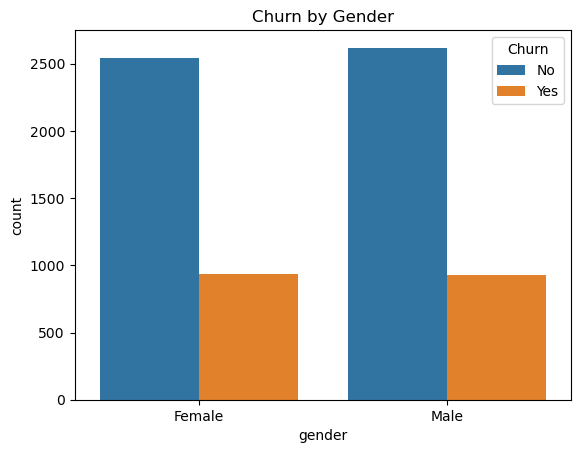

In [21]:
# Plot churn rate by gender
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn by Gender')
plt.show()

- **There was hardly any distinction in the percentage or number of customers who switched service providers. Both genders exhibited similar behavior** **when it came to transitioning to a different service provider or firm.**

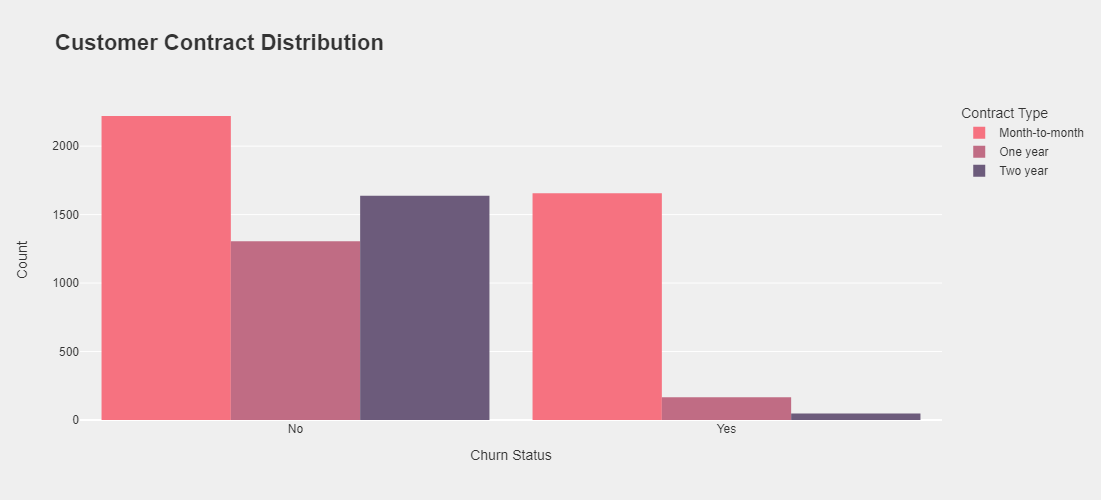

In [22]:
import plotly.express as px


fig = px.histogram(df, x="Churn", color="Contract", barmode="group",
                   title="<b>Customer Contract Distribution</b>",
                   color_discrete_sequence=['#F67280', '#C06C84', '#6C5B7B'])

fig.update_layout(
    width=700,
    height=500,
    bargap=0.1,
    title_font=dict(size=22, family='Arial', color='#333333'),
    xaxis_title='Churn Status',
    yaxis_title='Count',
    legend_title='Contract Type',
    paper_bgcolor='#EFEFEF',
    plot_bgcolor='#EFEFEF',
    font=dict(size=12, family='Helvetica', color='#333333')
)

fig.show()


- About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

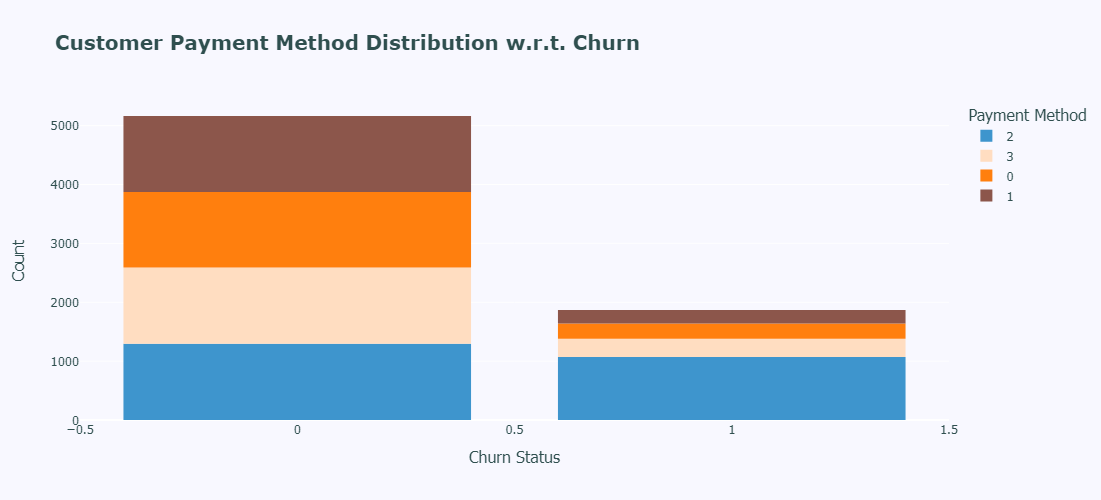

In [57]:

fig = px.histogram(df, x="Churn", color="PaymentMethod",
                   title="<b>Customer Payment Method Distribution w.r.t. Churn</b>",
                   color_discrete_sequence=['#3E95CD', '#FFDDC1', '#FF7F0E', '#8C564B'])

fig.update_layout(
    width=700,
    height=500,
    bargap=0.2,
    title_font=dict(size=20, family='Verdana', color='#2F4F4F'),
    xaxis_title='Churn Status',
    yaxis_title='Count',
    legend_title='Payment Method',
    paper_bgcolor='#F8F8FF',
    plot_bgcolor='#F8F8FF',
    font=dict(size=13, family='Tahoma', color='#2F4F4F')
)

fig.show()


- Major customers who moved out were having Electronic Check as Payment Method.
- Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

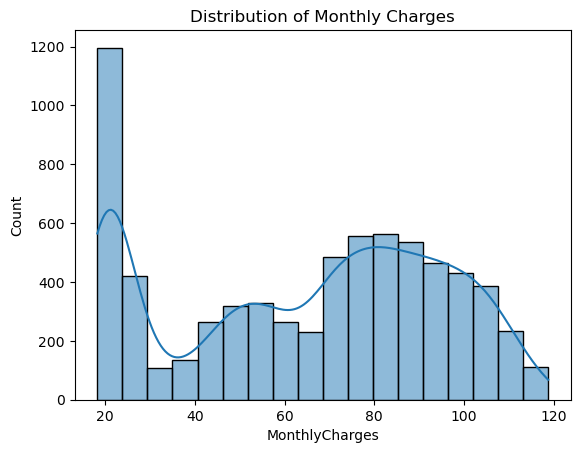

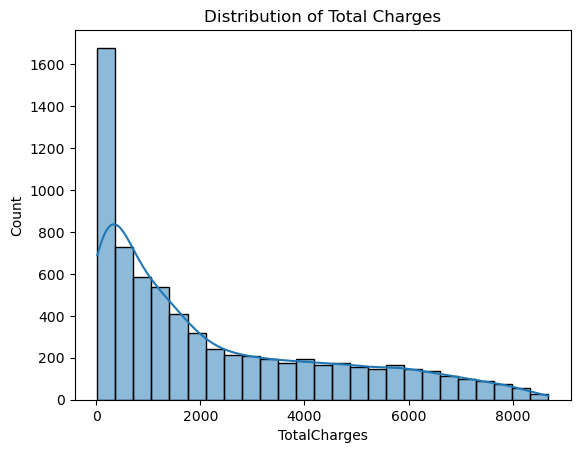

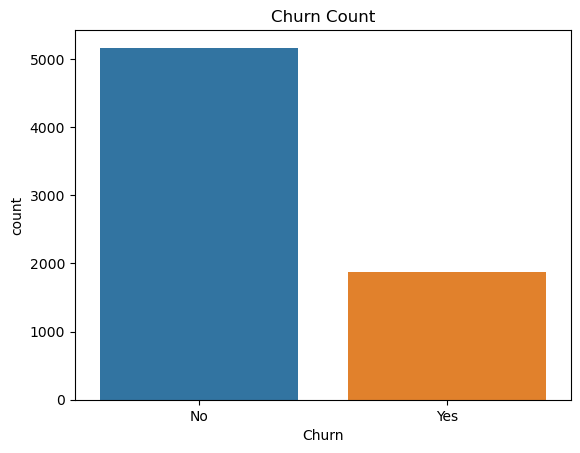

In [24]:
# Plot distribution of numerical features
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')
plt.show()

sns.histplot(df['TotalCharges'], kde=True)
plt.title('Distribution of Total Charges')
plt.show()

# Plot churn rate
sns.countplot(x='Churn', data=df)
plt.title('Churn Count')
plt.show()



In [25]:
 df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

In [26]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
Name: count, dtype: int64

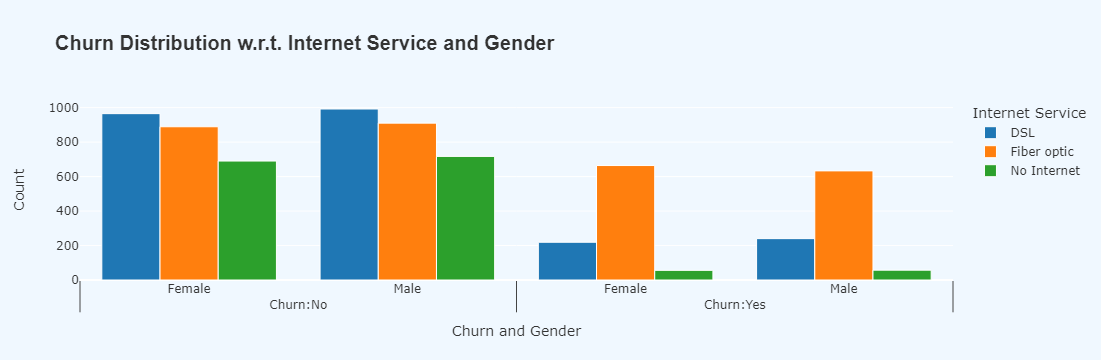

In [59]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
    x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
         ["Female", "Male", "Female", "Male"]],
    y = [965, 992, 219, 240],
    name = 'DSL',
    marker=dict(color='#1f77b4', line=dict(color='#FFFFFF', width=1))
))

fig.add_trace(go.Bar(
    x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
         ["Female", "Male", "Female", "Male"]],
    y = [889, 910, 664, 633],
    name = 'Fiber optic',
    marker=dict(color='#ff7f0e', line=dict(color='#FFFFFF', width=1))
))

fig.add_trace(go.Bar(
    x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
         ["Female", "Male", "Female", "Male"]],
    y = [690, 717, 56, 57],
    name = 'No Internet',
    marker=dict(color='#2ca02c', line=dict(color='#FFFFFF', width=1))
))

fig.update_layout(
    title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>",
    title_font=dict(size=20, family='Arial', color='#333333'),
    xaxis_title='Churn and Gender',
    yaxis_title='Count',
    legend_title='Internet Service',
    paper_bgcolor='#F0F8FF',
    plot_bgcolor='#F0F8FF',
    font=dict(size=12, family='Verdana', color='#333333')
)

fig.show()


- Many customers opt for Fiber optic service, and it's clear that those who use Fiber optic tend to have a high churn rate, indicating potential dissatisfaction with this type of internet service. DSL service users make up the majority of customers and experience lower churn rates compared to Fiber optic service.

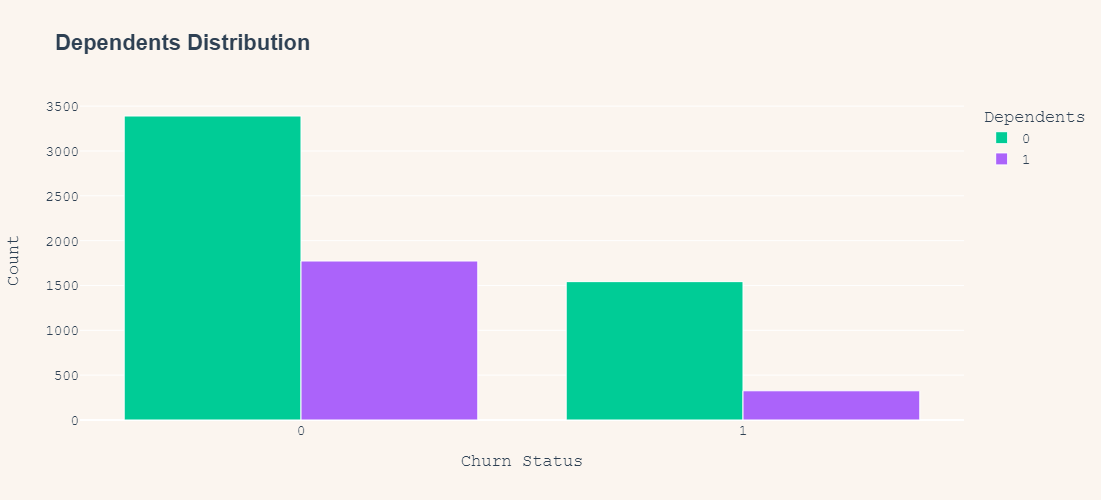

In [60]:

color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}


fig = px.histogram(df, x="Churn", color="Dependents", barmode="group",
                   title="<b>Dependents Distribution</b>",
                   color_discrete_map=color_map)

fig.update_layout(
    width=700,
    height=500,
    bargap=0.2,
    title_font=dict(size=22, family='Helvetica', color='#2E4053'),
    xaxis_title='Churn Status',
    yaxis_title='Count',
    legend_title='Dependents',
    paper_bgcolor='#FBF5EF',
    plot_bgcolor='#FBF5EF',
    font=dict(size=14, family='Courier New', color='#2E4053')
)

fig.update_traces(marker_line_width=1, marker_line_color='#FFFFFF')

fig.show()

- Customers without dependents are more likely to churn


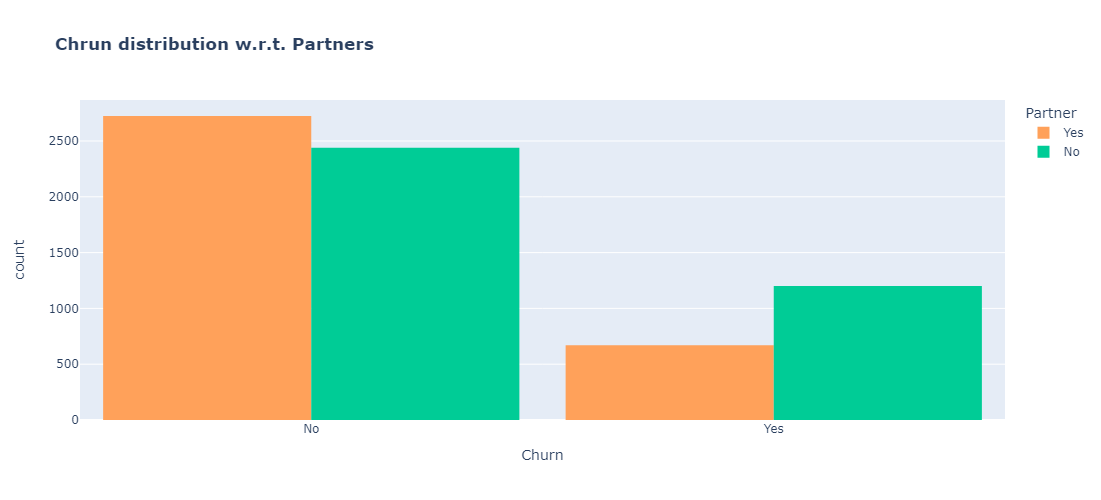

In [29]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- Customers that doesn't have partners are more likely to churn


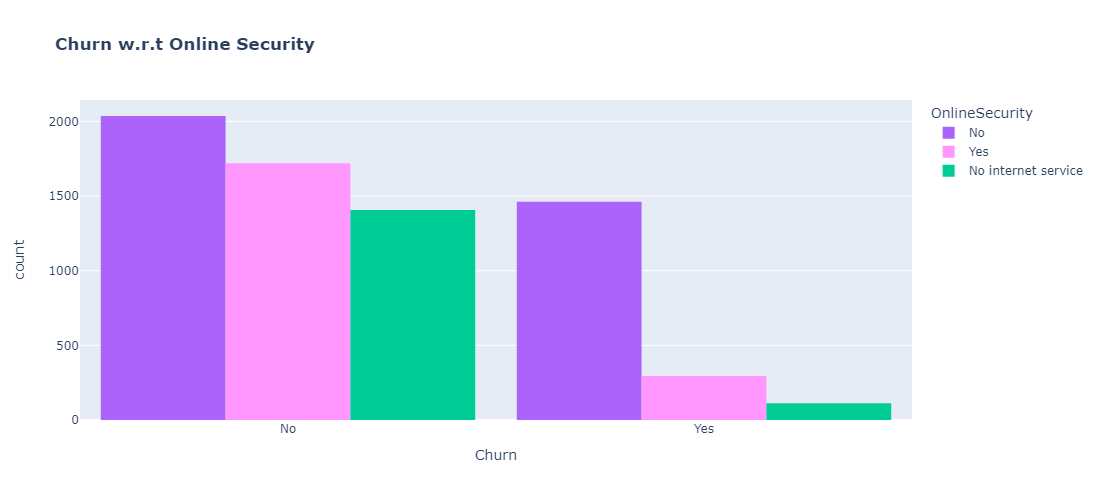

In [30]:

color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- Most customers churn in the absence of online security,

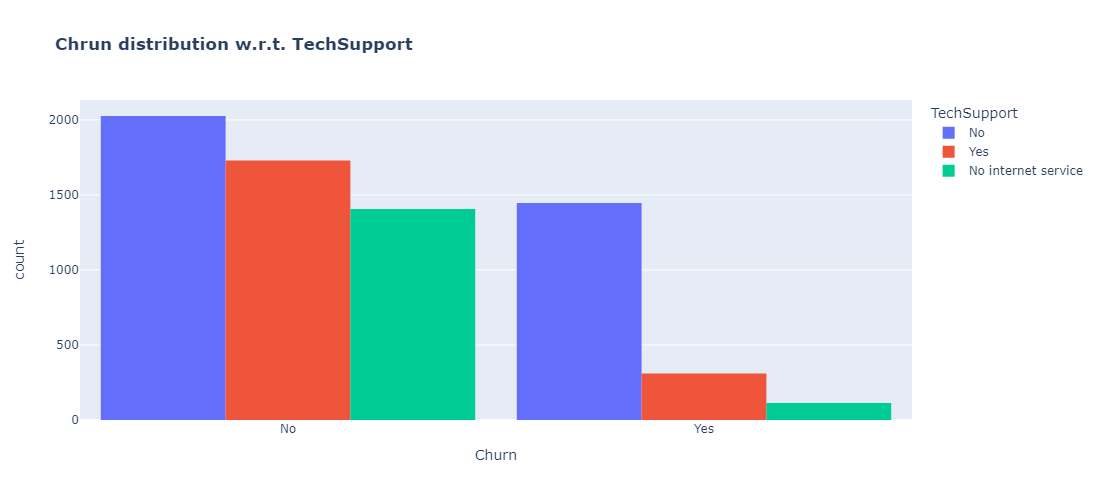

In [31]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- Customers with no TechSupport are most likely to migrate to another service provider.

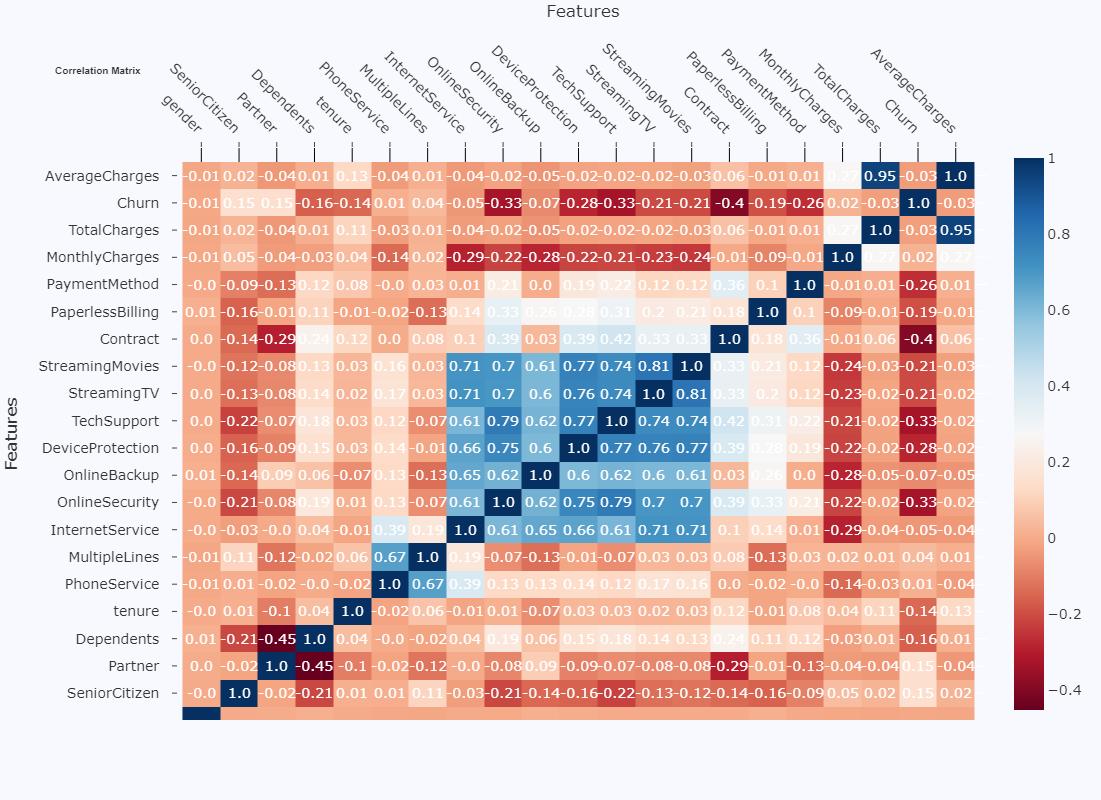

In [66]:
import plotly.figure_factory as ff
import plotly.express as px
import pandas as pd
import numpy as np

df_numeric = df.apply(lambda x: pd.factorize(x)[0])

# Compute correlation matrix
corr = df_numeric.corr()

# Create heatmap with Plotly
fig = ff.create_annotated_heatmap(z=corr.values,
                                  x=list(corr.columns),
                                  y=list(corr.index),
                                  colorscale='RdBu',
                                  annotation_text=corr.round(2).values,
                                  showscale=True)

# Update layout
fig.update_layout(title="<b>Correlation Matrix</b>",
                  title_font=dict(size=10, family='Arial', color='#333333'),
                  xaxis_title='Features',
                  yaxis_title='Features',
                  xaxis=dict(ticks='outside', tickangle=45),
                  yaxis=dict(ticks='outside'),
                  plot_bgcolor='#F8F8FF',
                  paper_bgcolor='#F8F8FF',
                  font=dict(size=14, family='Verdana', color='#333333'),
                  width=1200,  # Increased width
                  height=800)  # Increased height

# Show plot
fig.show()

## 8. Data Preprocessing

### Feature Engineering 

In [33]:
df['AverageCharges'] = df['TotalCharges'] / df['tenure']

# Handle any infinite or NaN values resulted from division by zero
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['AverageCharges'], inplace=True)

- Splitting the data into train and test sets

In [34]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [35]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AverageCharges
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,29.85,0,29.850000
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1889.50,0,55.573529
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,1,54.075000
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1840.75,0,40.905556
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,75.825000


In [36]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
AverageCharges      0.192033
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [37]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [39]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

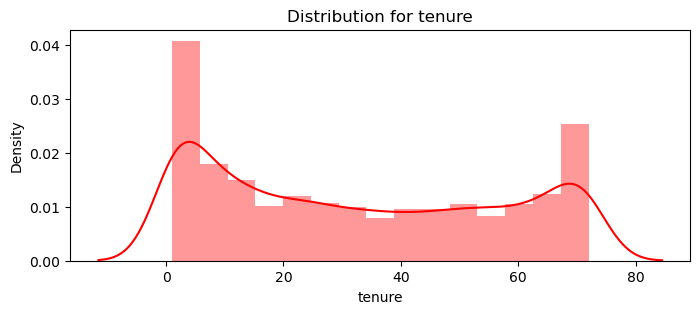

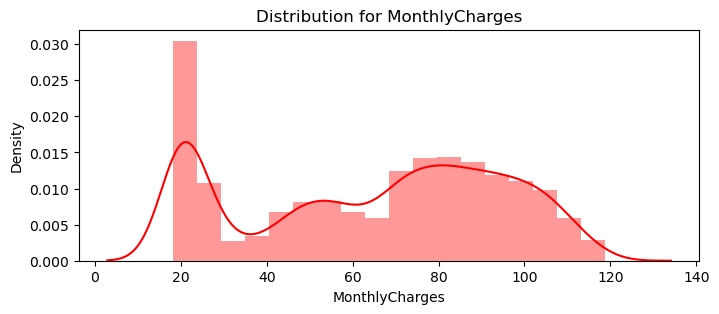

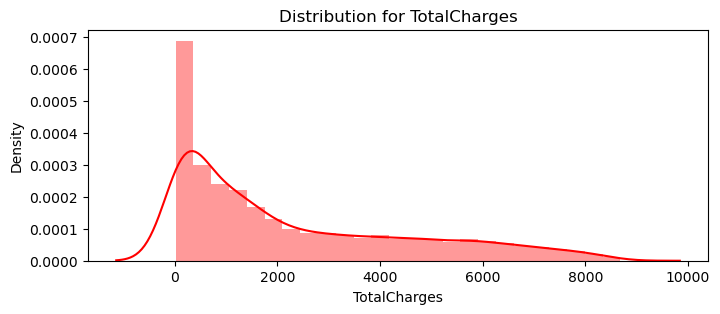

In [40]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

- Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

**Standardizing numeric attributes**

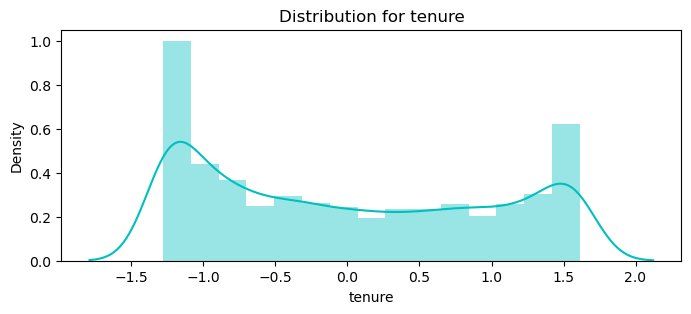

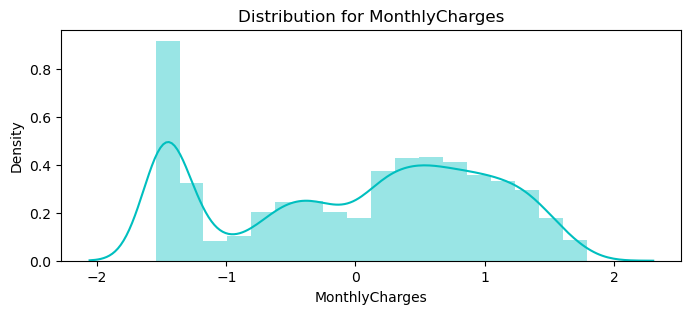

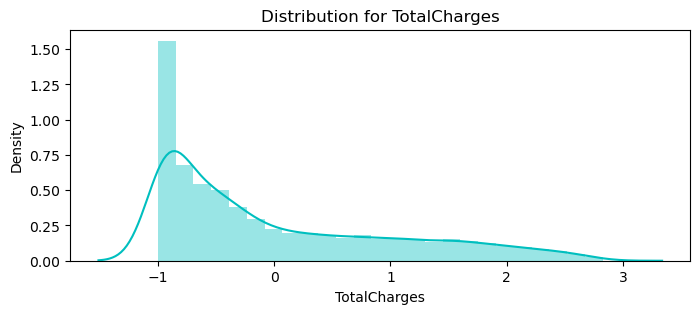

In [41]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

In [42]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [43]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## 9. Machine Learning Model Evaluations and Predictions

In [44]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7758293838862559


In [45]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1549
           1       0.58      0.54      0.56       561

    accuracy                           0.78      2110
   macro avg       0.71      0.70      0.71      2110
weighted avg       0.77      0.78      0.77      2110



In [46]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7341232227488151


In [47]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.73      0.62      2110



In [48]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8123222748815165


In [49]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1549
           1       0.71      0.50      0.59       561

    accuracy                           0.81      2110
   macro avg       0.77      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



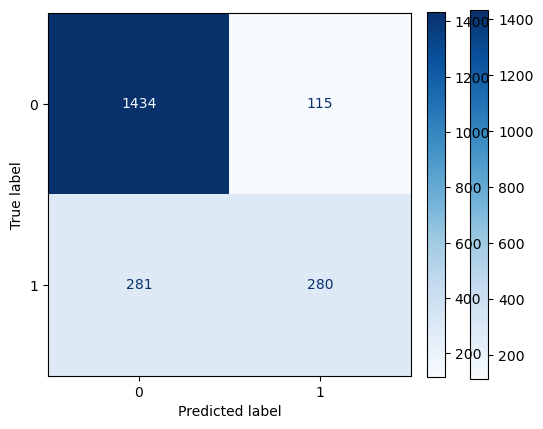

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

# Generate random actual and predicted values
actual = np.random.binomial(1, .9, size=1000)
predicted = np.random.binomial(1, .9, size=1000)

# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, prediction_test)

# Customize the colormap for better color differentiation
cmap = plt.get_cmap('Blues')

# Plot the confusion matrix with the customized colormap
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
cm_display.plot(cmap=cmap)

# Customize the color bar for better visibility
plt.colorbar(cm_display.im_, fraction=0.046, pad=0.04)
plt.show()


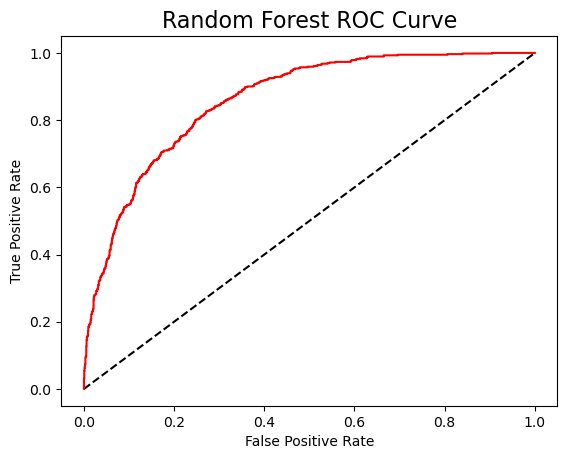

In [51]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

In [52]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8071090047393364


In [53]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.57      0.61       561

    accuracy                           0.81      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



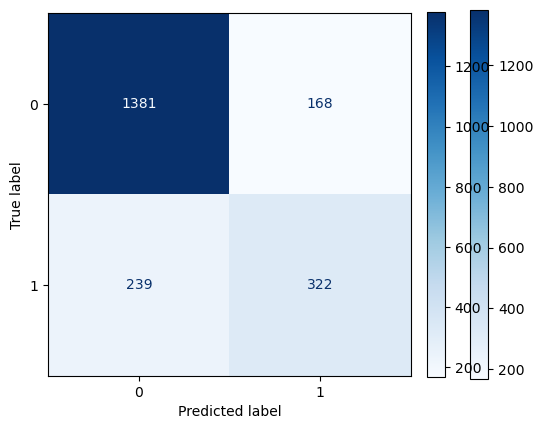

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

# Generate random actual and predicted values
actual = np.random.binomial(1, .9, size=1000)
predicted = np.random.binomial(1, .9, size=1000)

# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,lr_pred)

# Customize the colormap for better color differentiation
cmap = plt.get_cmap('Blues')

# Plot the confusion matrix with the customized colormap
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
cm_display.plot(cmap=cmap)

# Customize the color bar for better visibility
plt.colorbar(cm_display.im_, fraction=0.046, pad=0.04)
plt.show()

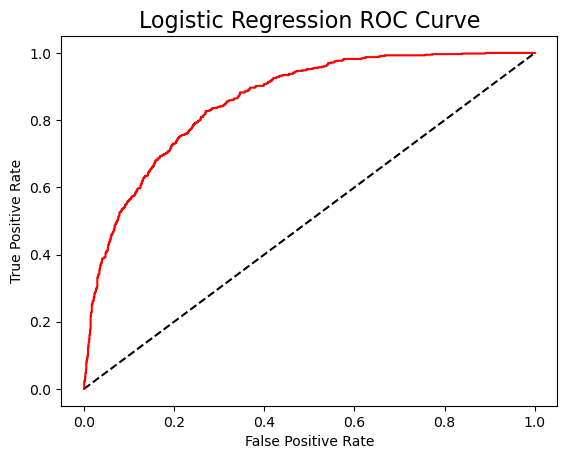

In [55]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();